# Quick Start

This tutorial provides a quick start to the `Calzone` package, including a discussion of the installation and the basic command line interface usage.

The `Calzone` package includes a variety of commonly used calibration metrics. Expected Calibration Error (ECE) summarizes the average difference between predicted probabilities and actual outcomes across bins. Maximum Calibration Error (MCE) reports the worst-case deviation among bins. Hosmer-Lemeshow (HL) statistic compares observed and expected frequencies across groups to detect lack of fit, often used in medical risk modeling. Integrated Calibration Index (ICI) measures the average absolute difference between predicted probabilities and observed frequencies across the entire probability range using curve fitting. Spiegelhalter’s Z-statistic tests whether predicted probabilities are systematically too high or too low, based on a normal approximation. Cox’s calibration slope and intercept are obtained by regressing the log odds of predicted probabilities against the observed outcomes, where a slope of 1 and an intercept of 0 indicate perfect calibration. Many of these metrics can be computed either for the top predicted class or for each class individually, with user-defined binning schemes.

## Installation

We recommend that you install `Calzone` from pip:

In [ ]:
pip install calzone-tool

Alternatively, you can install the package and its dependencies manually. `Calzone` has very few dependencies: NumPy, SciPy, Statsmodels and Matplotlib:

In [ ]:
pip install numpy
pip install scipy
pip install matplotlib 
pip install statsmodels

Then, the package can be installed directly from the GitHub repository:

In [ ]:
pip install -e "git+https://github.com/DIDSR/calzone.git"

Note that if you wish to use the experimental GUI interface, you will also need the additional dependency NiceGUI (`pip install nicegui`).

## Command line interface 

First, you need to prepare your dataset in a specific format. The dataset should be a CSV file with the following columns:


proba_0, proba_1, ..., proba_n, label


where n >= 1. The proba_i columns are the probabilities of the i-th class, and the label column is the true class label.

Or if you have subgroups, the dataset should be a CSV file with the following columns:


proba_0, proba_1, ..., proba_n, subgroup_1, subgroup_2, ..., subgroup_m, label


where n >= 1 and m >= 1. The subgroup_j columns are the values of the j-th subgroup type, and its values should be categorical.


In the case of multi-class, you need to specify the class-of-interest, and the problem will be treated as 1-vs-all binary classification. To test the full calibration of the whole model, you need to test the calibration of each class.

The program also works if your csv file has no header.It will assume the first [:-1] columns are the probabilities and the last column is the label.

We have provided example datasets in the examples folder to illustrate the CSV input format `Calzone` expects.


In [6]:
### For illuration purpose , I will use the functions in the helper.py in the local directory
### The data is generated using beta-binomial distribution


from helper import * #import local helper functions for example data generation

generate_wellcal_data(5000,"../../../example_data/simulated_welldata.csv",alpha_val=0.5, beta_val=0.5,random_seed=123)
generate_miscal_data(5000,"../../../example_data/simulated_misdata.csv", miscal_scale=2,alpha_val=0.5, beta_val=0.5,random_seed=123)
generate_subgroup_data(5000,"../../../example_data/simulated_data_subgroup.csv",miscal_scale=2,alpha_val=0.5, beta_val=0.5,random_seed=123)

In [3]:
### Snippet of the csv file format
#Without subgroups
import numpy as np
print("Without subgroups")
print(np.loadtxt('../../../example_data/simulated_welldata.csv',dtype=str)[:5]) #first 5 lines of the without subgroups csv files
#With subgroups
print("With subgroups")
print(np.loadtxt('../../../example_data/simulated_data_subgroup.csv',dtype=str)[:5]) #first 5 lines of the with subgroups csv files

Without subgroups
['proba_0,proba_1,label'
 '1.444156178040510996e-01,8.555843821959489004e-01,0.000000000000000000e+00'
 '8.552048445812980848e-01,1.447951554187018874e-01,0.000000000000000000e+00'
 '2.569696048872897043e-01,7.430303951127102957e-01,0.000000000000000000e+00'
 '3.993130565553012490e-01,6.006869434446987510e-01,1.000000000000000000e+00']
With subgroups
['proba_0,proba_1,subgroup_1,label'
 '0.1444156178040511,0.8555843821959489,A,0'
 '0.8552048445812981,0.1447951554187019,A,0'
 '0.2569696048872897,0.7430303951127103,A,0'
 '0.39931305655530125,0.6006869434446988,A,1']


To use the command line interface (CLI), you can use the script in the `calzone` directory. The program will save the metrics into the output csv file with the CI (if you turn on boostrap). The program will also save the relibaility diagram if you apply --plot flag. There is an optional flag --prevalence_adjustment which tries to derive the original model prevalence and apply prevalence adjustment. See more on prevalence adjustment in the prevalecne adjustment notebook.

In [1]:
# Use -h to see the help message and options
%run ../../../cal_metrics.py -h

usage: cal_metrics.py [-h] [--csv_file CSV_FILE] [--metrics METRICS]
                      [--prevalence_adjustment] [--n_bootstrap N_BOOTSTRAP]
                      [--bootstrap_ci BOOTSTRAP_CI]
                      [--class_to_calculate CLASS_TO_CALCULATE]
                      [--num_bins NUM_BINS]
                      [--hl_test_validation HL_TEST_VALIDATION] [--topclass]
                      [--save_metrics SAVE_METRICS] [--plot]
                      [--plot_bins PLOT_BINS] [--save_plot SAVE_PLOT]
                      [--save_diagram_output SAVE_DIAGRAM_OUTPUT] [--verbose]

Calculate calibration metrics and visualize reliability diagram.

options:
  -h, --help            show this help message and exit
  --csv_file CSV_FILE   Path to the input CSV file. (If there is header,it
                        must be in: proba_0,proba_1,...,subgroup_1(optional),s
                        ubgroup_2(optional),...label. If no header, then the
                        columns must be in the

Metrics with bootstrap confidence intervals:
SpiegelhalterZ score: 0.376 (-1.581, 2.396)
SpiegelhalterZ p-value: 0.707 (0.017, 0.971)
ECE-H topclass: 0.01 (0.006, 0.021)
ECE-H: 0.012 (0.011, 0.025)
MCE-H topclass: 0.039 (0.016, 0.076)
MCE-H: 0.048 (0.034, 0.107)
HL-H score: 8.885 (7.392, 34.058)
HL-H p-value: 0.352 (0.000, 0.495)
ECE-C topclass: 0.009 (0.007, 0.021)
ECE-C: 0.009 (0.008, 0.022)
MCE-C topclass: 0.021 (0.018, 0.072)
MCE-C: 0.023 (0.020, 0.071)
HL-C score: 3.695 (4.778, 28.666)
HL-C p-value: 0.884 (0.000, 0.781)
COX coef: 0.994 (0.940, 1.054)
COX intercept: -0.045 (-0.126, 0.031)
COX coef lowerci: 0.937 (0.886, 0.994)
COX coef upperci: 1.051 (0.994, 1.114)
COX intercept lowerci: -0.123 (-0.205, -0.049)
COX intercept upperci: 0.034 (-0.048, 0.109)
COX ICI: 0.006 (0.001, 0.016)
Loess ICI: 0.006 (0.004, 0.016)


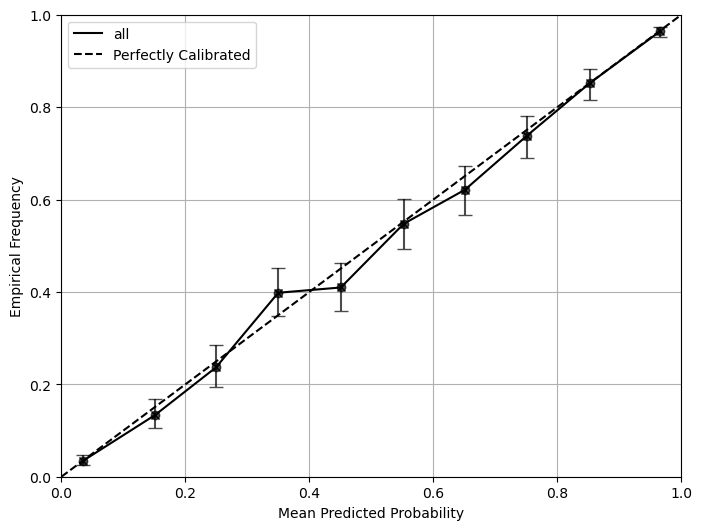

In [8]:
%run ../../../cal_metrics.py \
--csv_file '../../../example_data/simulated_welldata.csv' \
--metrics all \
--n_bootstrap 1000 \
--bootstrap_ci 0.95 \
--class_to_calculate 1 \
--num_bins 10 \
--save_metrics '../../../example_data/simulated_welldata_result.csv' \
--plot \
--plot_bins 10 \
--save_plot '../../../example_data/simulated_welldata_result.png' \
--verbose \
--save_diagram_output '../../../example_data/simulated_welldata_diagram_output.csv' 
### save_diagram_output only when you want to save the reliability diagram output
#--prevalence_adjustment # only when you want to apply prevalence adjustment
#--hl_test_validation #use it only when the data is from validation set

We use the CLI to compute the metrics and reliability diagram for the example dataset. The metrics and its 95% confidence interval will be printed and saved in a file. The reliability diagram will be saved in a separate file.

We can also test it on a miscalibrated dataset. The miscalibration is introduced by mutliply the log of probabilities by 2 and convert it back to probabilities. 

Metrics with bootstrap confidence intervals:
SpiegelhalterZ score: 29.626 (26.37, 33.185)
SpiegelhalterZ p-value: 0. (0., 0.)
ECE-H topclass: 0.081 (0.073, 0.091)
ECE-H: 0.081 (0.073, 0.092)
MCE-H topclass: 0.151 (0.127, 0.202)
MCE-H: 0.168 (0.145, 0.244)
HL-H score: 1027.940 (818.524, 1292.977)
HL-H p-value: 0. (0., 0.)
ECE-C topclass: 0.079 (0.069, 0.09)
ECE-C: 0.08 (0.07, 0.091)
MCE-C topclass: 0.168 (0.141, 0.204)
MCE-C: 0.158 (0.139, 0.203)
HL-C score: 1857.584 (1355.637, 3341.319)
HL-C p-value: 0. (0., 0.)
COX coef: 0.497 (0.470, 0.524)
COX intercept: -0.045 (-0.125, 0.038)
COX coef lowerci: 0.469 (0.443, 0.494)
COX coef upperci: 0.526 (0.497, 0.554)
COX intercept lowerci: -0.123 (-0.203, -0.041)
COX intercept upperci: 0.034 (-0.046, 0.116)
COX ICI: 0.078 (0.071, 0.085)
Loess ICI: 0.074 (0.065, 0.083)


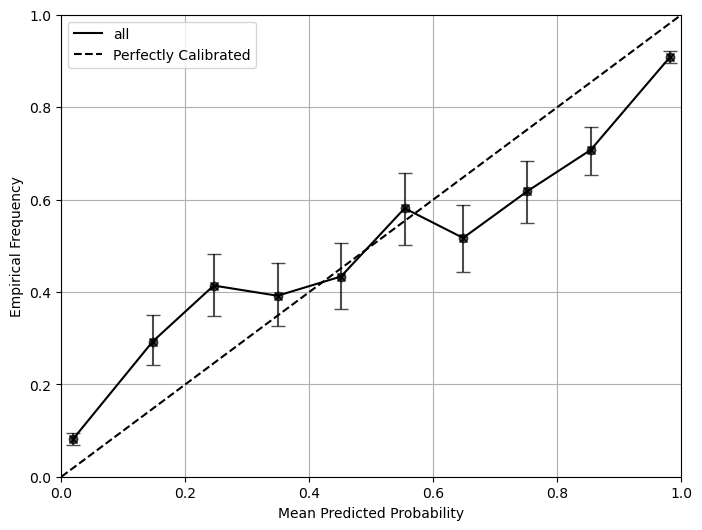

In [9]:
%run ../../../cal_metrics.py \
--csv_file '../../../example_data/simulated_misdata.csv' \
--metrics all \
--n_bootstrap 1000 \
--bootstrap_ci 0.95 \
--class_to_calculate 1 \
--num_bins 10 \
--save_metrics '../../../example_data/simulated_misdata_result.csv' \
--plot \
--plot_bins 10 \
--save_plot '../../../example_data/simulated_misdata_result.png' \
--verbose

If your data has subgroups in it, simply run the script with the same argument as the one above. It will automatically detect the subgroup and generate the corresponding plots and metrics for each subgroup as well as the overall plot and metrics.

Metrics with bootstrap confidence intervals:
SpiegelhalterZ score: 18.327 (15.794, 21.009)
SpiegelhalterZ p-value: 0. (0., 0.)
ECE-H topclass: 0.042 (0.035, 0.049)
ECE-H: 0.042 (0.036, 0.049)
MCE-H topclass: 0.055 (0.043, 0.087)
MCE-H: 0.063 (0.055, 0.109)
HL-H score: 429.732 (335.116, 584.729)
HL-H p-value: 0. (0., 0.)
ECE-C topclass: 0.042 (0.035, 0.049)
ECE-C: 0.038 (0.032, 0.046)
MCE-C topclass: 0.065 (0.055, 0.091)
MCE-C: 0.064 (0.052, 0.086)
HL-C score: 1138.842 (779.577, 1844.15)
HL-C p-value: 0. (0., 0.)
COX coef: 0.668 (0.638, 0.698)
COX intercept: -0.02 (-0.073, 0.03)
COX coef lowerci: 0.641 (0.611, 0.67)
COX coef upperci: 0.696 (0.664, 0.727)
COX intercept lowerci: -0.074 (-0.127, -0.025)
COX intercept upperci: 0.034 (-0.019, 0.084)
COX ICI: 0.049 (0.044, 0.055)
Loess ICI: 0.037 (0.032, 0.043)


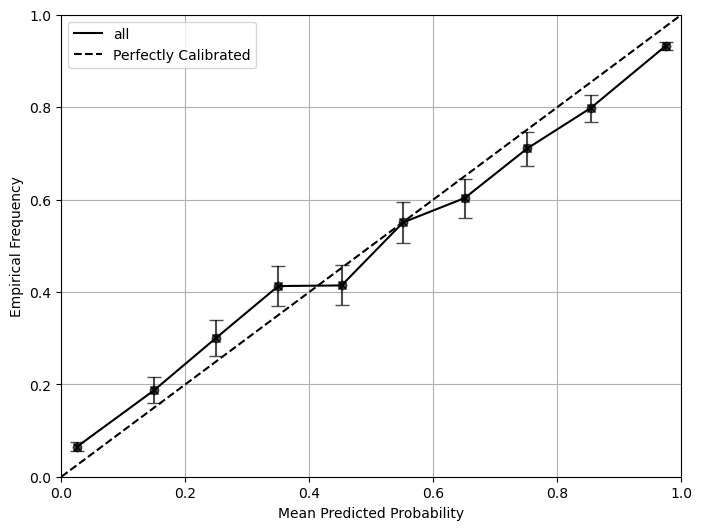

Metrics for subgroup_1_group_A with bootstrap confidence intervals:
SpiegelhalterZ score: 0.376 (-1.536, 2.249)
SpiegelhalterZ p-value: 0.707 (0.018, 0.981)
ECE-H topclass: 0.01 (0.006, 0.021)
ECE-H: 0.012 (0.011, 0.025)
MCE-H topclass: 0.039 (0.017, 0.077)
MCE-H: 0.048 (0.034, 0.107)
HL-H score: 8.885 (7.273, 34.6)
HL-H p-value: 0.352 (0.000, 0.507)
ECE-C topclass: 0.009 (0.007, 0.022)
ECE-C: 0.009 (0.007, 0.023)
MCE-C topclass: 0.021 (0.018, 0.072)
MCE-C: 0.023 (0.018, 0.075)
HL-C score: 3.695 (4.463, 29.686)
HL-C p-value: 0.884 (0.000, 0.813)
COX coef: 0.994 (0.942, 1.050)
COX intercept: -0.045 (-0.135, 0.028)
COX coef lowerci: 0.937 (0.888, 0.990)
COX coef upperci: 1.051 (0.996, 1.111)
COX intercept lowerci: -0.123 (-0.214, -0.051)
COX intercept upperci: 0.034 (-0.056, 0.107)
COX ICI: 0.006 (0.001, 0.017)
Loess ICI: 0.006 (0.003, 0.016)


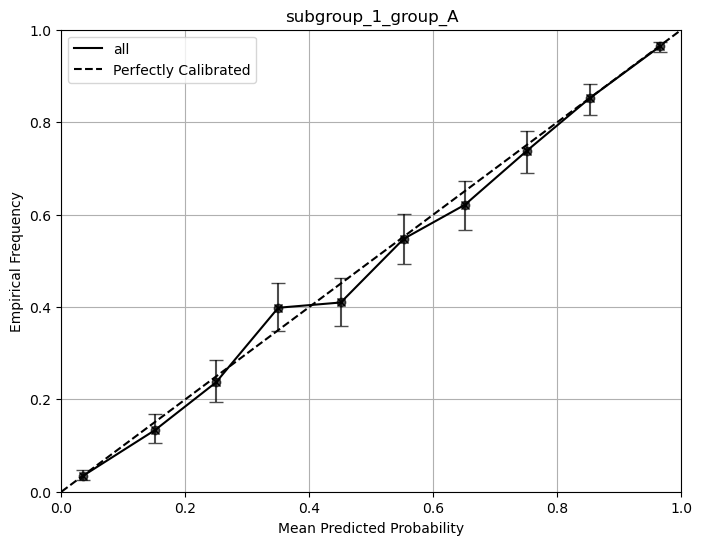

Metrics for subgroup_1_group_B with bootstrap confidence intervals:
SpiegelhalterZ score: 27.936 (24.631, 31.175)
SpiegelhalterZ p-value: 0. (0., 0.)
ECE-H topclass: 0.077 (0.068, 0.086)
ECE-H: 0.077 (0.069, 0.087)
MCE-H topclass: 0.133 (0.108, 0.175)
MCE-H: 0.163 (0.13, 0.232)
HL-H score: 910.439 (716.681, 1156.971)
HL-H p-value: 0. (0., 0.)
ECE-C topclass: 0.074 (0.066, 0.084)
ECE-C: 0.075 (0.065, 0.085)
MCE-C topclass: 0.141 (0.124, 0.182)
MCE-C: 0.140 (0.115, 0.182)
HL-C score: 2246.171 (1393.175, 3900.391)
HL-C p-value: 0. (0., 0.)
COX coef: 0.507 (0.481, 0.539)
COX intercept: 0.000 (-0.073, 0.077)
COX coef lowerci: 0.478 (0.454, 0.508)
COX coef upperci: 0.536 (0.508, 0.569)
COX intercept lowerci: -0.078 (-0.152, -0.002)
COX intercept upperci: 0.079 (0.005, 0.155)
COX ICI: 0.077 (0.07, 0.085)
Loess ICI: 0.07 (0.062, 0.078)


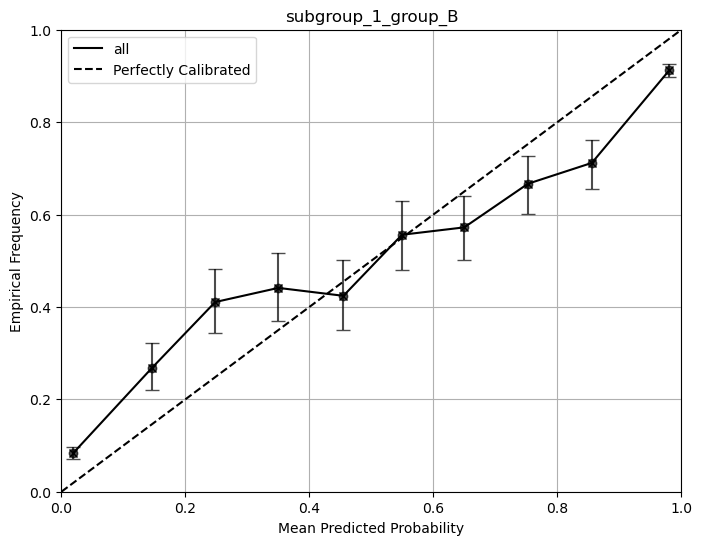

In [10]:
%run ../../../cal_metrics.py \
--csv_file '../../../example_data/simulated_data_subgroup.csv' \
--metrics all \
--n_bootstrap 1000 \
--bootstrap_ci 0.95 \
--class_to_calculate 1 \
--num_bins 10 \
--save_metrics '../../../example_data/simulated_data_subgroup_result.csv' \
--plot \
--plot_bins 10 \
--save_plot '../../../example_data/simulated_data_subgroup_result.png' \
--verbose

## Using `Calzone` in python

Instead of running the command line tool, you can also use `Calzone` in python directly

In [1]:
from calzone.metrics import CalibrationMetrics
from calzone.utils import data_loader

loader = data_loader('../../../example_data/simulated_welldata.csv')
cal_metrics = CalibrationMetrics(class_to_calculate=1)
cal_metrics.calculate_metrics(loader.labels, loader.probs, metrics='all')

{'SpiegelhalterZ score': 0.3763269161877356,
 'SpiegelhalterZ p-value': 0.7066738713391099,
 'ECE-H topclass': 0.009608653731328977,
 'ECE-H': 0.01208775955804901,
 'MCE-H topclass': 0.03926468843081976,
 'MCE-H': 0.04848338618970194,
 'HL-H score': 8.884991559088098,
 'HL-H p-value': 0.35209071874348785,
 'ECE-C topclass': 0.009458033653818828,
 'ECE-C': 0.008733966945443138,
 'MCE-C topclass': 0.020515047600205505,
 'MCE-C': 0.02324031223486256,
 'HL-C score': 3.694947603203135,
 'HL-C p-value': 0.8835446575708198,
 'COX coef': 0.9942499557748269,
 'COX intercept': -0.04497652296600376,
 'COX coef lowerci': 0.9372902801721911,
 'COX coef upperci': 1.0512096313774626,
 'COX intercept lowerci': -0.12348577118577644,
 'COX intercept upperci': 0.03353272525376893,
 'COX ICI': 0.005610391483826338,
 'Loess ICI': 0.00558856942568957}